# Corporate Credit Rating Prediction

Is it possible to predict the credit rating of a company with its financial Ratios?



## The Dataset

- **Liquidity Measurement Ratios**: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding, daysOfInventoryOutstanding, operatingCycle, daysOfPayablesOutstanding, cashConversionCycle

- **Profitability Indicator Ratios**: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed, netIncomePerEBT, ebtPerEbit, ebitPerRevenue

- **Debt Ratios**: debtRatio, debtEquityRatio, longTermDebtToCapitalization, totalDebtToCapitalization, interestCoverage, cashFlowToDebtRatio, companyEquityMultiplier

- **Operating Performance Ratios**: receivablesTurnover, payablesTurnover, inventoryTurnover, fixedAssetTurnover, assetTurnover Cash Flow Indicator Ratios: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, payoutRatio, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio, cashFlowCoverageRatios, shortTermCoverageRatios, capitalExpenditureCoverageRatio, dividendPaidAndCapexCoverageRatio, dividendPayoutRatio, 


#### Import Libraries

In [58]:
import pandas as pd
import matplotlib as plt
import re

## Data Exploration

In [84]:
df_rating = pd.read_csv('data/rating_dataframe_NA.csv')

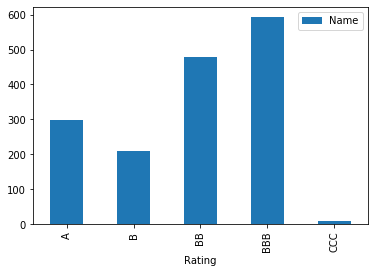

In [90]:
df_rating_summary = df_rating.groupby('Rating').count().reset_index()
df_rating_summary.plot.bar(x='Rating', y='Name')

It is better to join all the A's together. 

In [86]:
df_rating.loc[df_rating['Rating'] == 'AA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'AAA','Rating'] = 'A' 

#### Plot Distributions 

In [100]:
df_rating.currentRationormalized = (df_rating.currentRatio-df_rating.currentRatio.mean())/df_rating.currentRatio.std()

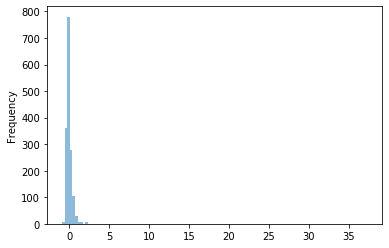

In [104]:
df_rating.currentRationormalized.plot.hist(bins=120, alpha=0.5)

In [91]:
df_rating.columns

Index(['Rating Agency Name', 'Name', 'Rating', 'Rating Outlook', 'date_x',
       'Clean_Name', 'Symbol', 'Sector', 'industry', 'month_rating',
       'year_change', 'year', 'Year', 'date_y', 'currentRatio', 'quickRatio',
       'cashRatio', 'daysOfSalesOutstanding', 'daysOfInventoryOutstanding',
       'operatingCycle', 'daysOfPayablesOutstanding', 'cashConversionCycle',
       'grossProfitMargin', 'operatingProfitMargin', 'netProfitMargin',
       'returnOnAssets', 'returnOnEquity', 'returnOnCapitalEmployed',
       'debtRatio', 'debtEquityRatio', 'longTermDebtToCapitalization',
       'totalDebtToCapitalization', 'interestCoverage', 'cashFlowToDebtRatio',
       'receivablesTurnover', 'payablesTurnover', 'inventoryTurnover',
       'fixedAssetTurnover', 'assetTurnover', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'freeCashFlowOperatingCashFlowRatio',
       'cashFlowCoverageRatios', 'shortTermCoverageRatios',
       'capitalExpenditureCoverageRatio'],
      dt